In [1]:
import pandas as pd
import seaborn as sns
import sqlalchemy

In [2]:
engine = sqlalchemy.create_engine('postgresql://sd@127.0.0.1:5432/postgres')

# 3장 시계열 분석

## 데이터 트렌드 분석

### 간단한 트렌드

In [3]:
sql = """
SELECT sales_month ,sales
FROM retail_sales
WHERE kind_of_business = 'Retail and food services sales, total'
ORDER BY 1;
"""
df = pd.read_sql(sql, engine)
df

,sales_month,sales
0,1992-01-01,146376.0
1,1992-02-01,147079.0
2,1992-03-01,159336.0
3,1992-04-01,163669.0
4,1992-05-01,170068.0
...,...,...
343,2020-08-01,545307.0
344,2020-09-01,530987.0
345,2020-10-01,553114.0
346,2020-11-01,543273.0


<AxesSubplot:xlabel='sales_month', ylabel='sales'>

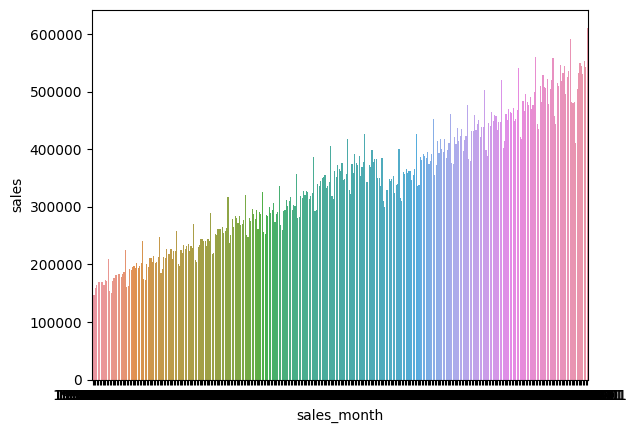

In [4]:
sns.barplot(data=df, x='sales_month', y='sales')

In [5]:
sql = """
SELECT date_part('year',sales_month) as sales_year, sum(sales) as sales
FROM retail_sales
WHERE kind_of_business = 'Retail and food services sales, total'
GROUP BY 1
ORDER BY 1;
"""
df = pd.read_sql(sql, engine)
df

,sales_year,sales
0,1992.0,2014102.0
1,1993.0,2153095.0
2,1994.0,2330235.0
3,1995.0,2450628.0
4,1996.0,2603794.0
5,1997.0,2726131.0
6,1998.0,2852956.0
7,1999.0,3086990.0
8,2000.0,3287537.0
9,2001.0,3378906.0


<AxesSubplot:xlabel='sales_year', ylabel='sales'>

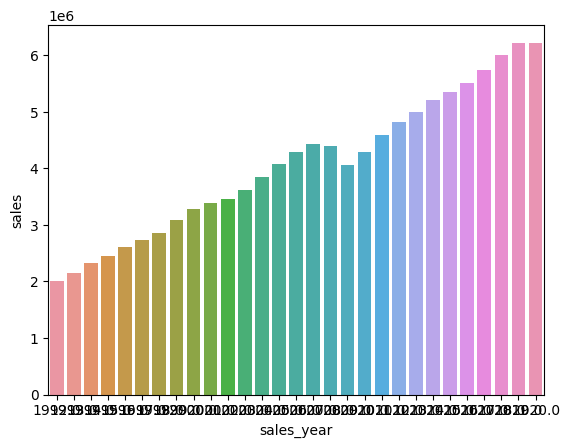

In [6]:
sns.barplot(data=df, x='sales_year', y='sales')

### 요소 비교

In [7]:
sql = """
SELECT date_part('year',sales_month) as sales_year, kind_of_business, sum(sales) as sales
FROM retail_sales
WHERE kind_of_business in ('Book stores','Sporting goods stores','Hobby, toy, and game stores')
GROUP BY 1,2
ORDER BY 1,2;
"""
df = pd.read_sql(sql, engine)
df

,sales_year,kind_of_business,sales
0,1992.0,Book stores,8327.0
1,1992.0,"Hobby, toy, and game stores",11251.0
2,1992.0,Sporting goods stores,15583.0
3,1993.0,Book stores,9108.0
4,1993.0,"Hobby, toy, and game stores",11651.0
...,...,...,...
82,2019.0,"Hobby, toy, and game stores",16261.0
83,2019.0,Sporting goods stores,43808.0
84,2020.0,Book stores,6425.0
85,2020.0,"Hobby, toy, and game stores",17287.0


In [8]:
sql = """
SELECT sales_month, kind_of_business, sales
FROM retail_sales
WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
ORDER BY 1,2;
"""
df = pd.read_sql(sql, engine)
df

,sales_month,kind_of_business,sales
0,1992-01-01,Men's clothing stores,701.0
1,1992-01-01,Women's clothing stores,1873.0
2,1992-02-01,Men's clothing stores,658.0
3,1992-02-01,Women's clothing stores,1991.0
4,1992-03-01,Men's clothing stores,731.0
...,...,...,...
691,2020-10-01,Women's clothing stores,2634.0
692,2020-11-01,Men's clothing stores,NaN
693,2020-11-01,Women's clothing stores,2726.0
694,2020-12-01,Men's clothing stores,604.0


In [9]:
sql = """
SELECT date_part('year',sales_month) as sales_year, kind_of_business, sum(sales) as sales
FROM retail_sales
WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')
GROUP BY 1,2
ORDER BY 1,2;
"""
df = pd.read_sql(sql, engine)
df

,sales_year,kind_of_business,sales
0,1992.0,Men's clothing stores,10179.0
1,1992.0,Women's clothing stores,31815.0
2,1993.0,Men's clothing stores,9962.0
3,1993.0,Women's clothing stores,32350.0
4,1994.0,Men's clothing stores,10032.0
5,1994.0,Women's clothing stores,30585.0
6,1995.0,Men's clothing stores,9315.0
7,1995.0,Women's clothing stores,28696.0
8,1996.0,Men's clothing stores,9546.0
9,1996.0,Women's clothing stores,28238.0


In [10]:
sql = """
SELECT date_part('year',sales_month) as sales_year
,sum(case when kind_of_business = 'Women''s clothing stores'
          then sales
          end) as womens_sales
,sum(case when kind_of_business = 'Men''s clothing stores'
          then sales
          end) as mens_sales
FROM retail_sales
WHERE kind_of_business in ('Men''s clothing stores'
,'Women''s clothing stores')
GROUP BY 1
ORDER BY 1;
"""
df = pd.read_sql(sql, engine)
df

,sales_year,womens_sales,mens_sales
0,1992.0,31815.0,10179.0
1,1993.0,32350.0,9962.0
2,1994.0,30585.0,10032.0
3,1995.0,28696.0,9315.0
4,1996.0,28238.0,9546.0
5,1997.0,27822.0,10069.0
6,1998.0,28332.0,10196.0
7,1999.0,29549.0,9667.0
8,2000.0,31447.0,9507.0
9,2001.0,31453.0,8625.0


In [11]:
sql = """
SELECT sales_year
,womens_sales - mens_sales as womens_minus_mens
,mens_sales - womens_sales as mens_minus_womens
FROM
(
    SELECT date_part('year',sales_month) as sales_year
    ,sum(case when kind_of_business = 'Women''s clothing stores'
              then sales
              end) as womens_sales
    ,sum(case when kind_of_business = 'Men''s clothing stores'
              then sales
              end) as mens_sales
    FROM retail_sales
    WHERE kind_of_business in ('Men''s clothing stores'
    ,'Women''s clothing stores')
    and sales_month <= '2019-12-01'
    GROUP BY 1
) a
ORDER BY 1;
"""
df = pd.read_sql(sql, engine)
df

,sales_year,womens_minus_mens,mens_minus_womens
0,1992.0,21636.0,-21636.0
1,1993.0,22388.0,-22388.0
2,1994.0,20553.0,-20553.0
3,1995.0,19381.0,-19381.0
4,1996.0,18692.0,-18692.0
5,1997.0,17753.0,-17753.0
6,1998.0,18136.0,-18136.0
7,1999.0,19882.0,-19882.0
8,2000.0,21940.0,-21940.0
9,2001.0,22828.0,-22828.0


In [12]:
sql = """
SELECT date_part('year',sales_month) as sales_year
,sum(case when kind_of_business = 'Women''s clothing stores'
          then sales end)
-
sum(case when kind_of_business = 'Men''s clothing stores'
          then sales end)
as womens_minus_mens
FROM retail_sales
WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores') 
and sales_month <= '2019-12-01'
GROUP BY 1
ORDER BY 1;
"""
df = pd.read_sql(sql, engine)
df

,sales_year,womens_minus_mens
0,1992.0,21636.0
1,1993.0,22388.0
2,1994.0,20553.0
3,1995.0,19381.0
4,1996.0,18692.0
5,1997.0,17753.0
6,1998.0,18136.0
7,1999.0,19882.0
8,2000.0,21940.0
9,2001.0,22828.0


In [13]:
sql = """
SELECT sales_year
,womens_sales / mens_sales as womens_times_of_mens
FROM
(
    SELECT date_part('year',sales_month) as sales_year
    ,sum(case when kind_of_business = 'Women''s clothing stores'
              then sales
              end) as womens_sales
    ,sum(case when kind_of_business = 'Men''s clothing stores'
              then sales
              end) as mens_sales
    FROM retail_sales
    WHERE kind_of_business in ('Men''s clothing stores'
    ,'Women''s clothing stores')
    and sales_month <= '2019-12-01'
    GROUP BY 1
) a
ORDER BY 1;
"""
df = pd.read_sql(sql, engine)
df

,sales_year,womens_times_of_mens
0,1992.0,3.125553
1,1993.0,3.247340
2,1994.0,3.048744
3,1995.0,3.080623
4,1996.0,2.958098
5,1997.0,2.763134
6,1998.0,2.778737
7,1999.0,3.056688
8,2000.0,3.307773
9,2001.0,3.646725


In [14]:
sql = """
SELECT sales_year
,(womens_sales / mens_sales - 1) * 100 as womens_pct_of_mens
FROM
(
    SELECT date_part('year',sales_month) as sales_year
    ,sum(case when kind_of_business = 'Women''s clothing stores'
              then sales
              end) as womens_sales
    ,sum(case when kind_of_business = 'Men''s clothing stores'
              then sales
              end) as mens_sales
    FROM retail_sales
    WHERE kind_of_business in ('Men''s clothing stores'
    ,'Women''s clothing stores')
    and sales_month <= '2019-12-01'
    GROUP BY 1
) a
ORDER BY 1;
"""
df = pd.read_sql(sql, engine)
df

,sales_year,womens_pct_of_mens
0,1992.0,212.555261
1,1993.0,224.733989
2,1994.0,204.874402
3,1995.0,208.062265
4,1996.0,195.809763
5,1997.0,176.313437
6,1998.0,177.873676
7,1999.0,205.668770
8,2000.0,230.777322
9,2001.0,264.672464


### 전체 대비 비율 계산

In [15]:
sql = """
SELECT sales_month
,kind_of_business
,sales * 100 / total_sales as pct_total_sales
FROM
(
    SELECT a.sales_month, a.kind_of_business, a.sales
    ,sum(b.sales) as total_sales
    FROM retail_sales a
    JOIN retail_sales b on a.sales_month = b.sales_month
    and b.kind_of_business in ('Men''s clothing stores'
    ,'Women''s clothing stores')
    WHERE a.kind_of_business in ('Men''s clothing stores'
    ,'Women''s clothing stores')
    GROUP BY 1,2,3
) aa
ORDER BY 1,2;
"""
df = pd.read_sql(sql, engine)
df

,sales_month,kind_of_business,pct_total_sales
0,1992-01-01,Men's clothing stores,27.233877
1,1992-01-01,Women's clothing stores,72.766123
2,1992-02-01,Men's clothing stores,24.839562
3,1992-02-01,Women's clothing stores,75.160438
4,1992-03-01,Men's clothing stores,23.324825
...,...,...,...
691,2020-10-01,Women's clothing stores,100.000000
692,2020-11-01,Men's clothing stores,NaN
693,2020-11-01,Women's clothing stores,100.000000
694,2020-12-01,Men's clothing stores,15.088683


In [16]:
sql = """
SELECT sales_month, kind_of_business, sales
,sum(sales) over (partition by sales_month) as total_sales
,sales * 100 / sum(sales) over (partition by sales_month) as pct_total
FROM retail_sales
WHERE kind_of_business in ('Men''s clothing stores'
,'Women''s clothing stores')
ORDER BY 1,2;
"""
df = pd.read_sql(sql, engine)
df

,sales_month,kind_of_business,sales,total_sales,pct_total
0,1992-01-01,Men's clothing stores,701.0,2574.0,27.233877
1,1992-01-01,Women's clothing stores,1873.0,2574.0,72.766123
2,1992-02-01,Men's clothing stores,658.0,2649.0,24.839562
3,1992-02-01,Women's clothing stores,1991.0,2649.0,75.160438
4,1992-03-01,Men's clothing stores,731.0,3134.0,23.324825
...,...,...,...,...,...
691,2020-10-01,Women's clothing stores,2634.0,2634.0,100.000000
692,2020-11-01,Men's clothing stores,NaN,2726.0,NaN
693,2020-11-01,Women's clothing stores,2726.0,2726.0,100.000000
694,2020-12-01,Men's clothing stores,604.0,4003.0,15.088683


In [17]:
sql = """
SELECT sales_month
,kind_of_business
,sales * 100 / yearly_sales as pct_yearly
FROM
(
    SELECT a.sales_month, a.kind_of_business, a.sales
    ,sum(b.sales) as yearly_sales
    FROM retail_sales a
    JOIN retail_sales b on
    date_part('year',a.sales_month) = date_part('year',b.sales_month)
    and a.kind_of_business = b.kind_of_business
    and b.kind_of_business in ('Men''s clothing stores'
    ,'Women''s clothing stores')
    WHERE a.kind_of_business in ('Men''s clothing stores'
    ,'Women''s clothing stores')
    GROUP BY 1,2,3
    ) aa
ORDER BY 1,2 ;
"""
df = pd.read_sql(sql, engine)
df

,sales_month,kind_of_business,pct_yearly
0,1992-01-01,Men's clothing stores,6.886728
1,1992-01-01,Women's clothing stores,5.887160
2,1992-02-01,Men's clothing stores,6.464289
3,1992-02-01,Women's clothing stores,6.258054
4,1992-03-01,Men's clothing stores,7.181452
...,...,...,...
691,2020-10-01,Women's clothing stores,9.929880
692,2020-11-01,Men's clothing stores,NaN
693,2020-11-01,Women's clothing stores,10.276710
694,2020-12-01,Men's clothing stores,16.408585


In [18]:
sql = """
SELECT sales_month, kind_of_business, sales
,sum(sales) over (partition by date_part('year',sales_month)
                               ,kind_of_business
                               ) as yearly_sales
,sales * 100 /
 sum(sales) over (partition by date_part('year',sales_month)
                               ,kind_of_business
                               ) as pct_yearly
FROM retail_sales
WHERE kind_of_business in ('Men''s clothing stores'
 ,'Women''s clothing stores')
ORDER BY 1,2;
"""
df = pd.read_sql(sql, engine)
df

,sales_month,kind_of_business,sales,yearly_sales,pct_yearly
0,1992-01-01,Men's clothing stores,701.0,10179.0,6.886728
1,1992-01-01,Women's clothing stores,1873.0,31815.0,5.887160
2,1992-02-01,Men's clothing stores,658.0,10179.0,6.464289
3,1992-02-01,Women's clothing stores,1991.0,31815.0,6.258054
4,1992-03-01,Men's clothing stores,731.0,10179.0,7.181452
...,...,...,...,...,...
691,2020-10-01,Women's clothing stores,2634.0,26526.0,9.929880
692,2020-11-01,Men's clothing stores,NaN,3681.0,NaN
693,2020-11-01,Women's clothing stores,2726.0,26526.0,10.276710
694,2020-12-01,Men's clothing stores,604.0,3681.0,16.408585


### 시계열 데이터 변화 이해를 위한 인덱싱

In [19]:
sql = """
SELECT sales_year, sales
,first_value(sales) over (order by sales_year) as index_sales
FROM
(
    SELECT date_part('year',sales_month) as sales_year
    ,sum(sales) as sales
    FROM retail_sales
    WHERE kind_of_business = 'Women''s clothing stores'
    GROUP BY 1
) a;
"""
df = pd.read_sql(sql, engine)
df

,sales_year,sales,index_sales
0,1992.0,31815.0,31815.0
1,1993.0,32350.0,31815.0
2,1994.0,30585.0,31815.0
3,1995.0,28696.0,31815.0
4,1996.0,28238.0,31815.0
5,1997.0,27822.0,31815.0
6,1998.0,28332.0,31815.0
7,1999.0,29549.0,31815.0
8,2000.0,31447.0,31815.0
9,2001.0,31453.0,31815.0


In [20]:
sql = """
SELECT sales_year, sales
,(sales / first_value(sales) over (order by sales_year) - 1) * 100
as pct_from_index
FROM
(
    SELECT date_part('year',sales_month) as sales_year
    ,sum(sales) as sales
    FROM retail_sales
    WHERE kind_of_business = 'Women''s clothing stores'
    GROUP BY 1
) a;
"""
df = pd.read_sql(sql, engine)
df

,sales_year,sales,pct_from_index
0,1992.0,31815.0,0.000000
1,1993.0,32350.0,1.681597
2,1994.0,30585.0,-3.866101
3,1995.0,28696.0,-9.803552
4,1996.0,28238.0,-11.243124
5,1997.0,27822.0,-12.550684
6,1998.0,28332.0,-10.947666
7,1999.0,29549.0,-7.122427
8,2000.0,31447.0,-1.156687
9,2001.0,31453.0,-1.137828


In [21]:
sql = """
SELECT sales_year, kind_of_business, sales
,(sales / first_value(sales) over (partition by kind_of_business order by sales_year) - 1) * 100 as pct_from_index
FROM
(
    SELECT date_part('year',sales_month) as sales_year
    ,kind_of_business
    ,sum(sales) as sales
    FROM retail_sales
    WHERE kind_of_business in ('Men''s clothing stores','Women''s clothing stores')  and sales_month <= '2019-12-31'
    GROUP BY 1,2
) a
ORDER BY 1,2;
"""
df = pd.read_sql(sql, engine)
df

,sales_year,kind_of_business,sales,pct_from_index
0,1992.0,Men's clothing stores,10179.0,0.000000
1,1992.0,Women's clothing stores,31815.0,0.000000
2,1993.0,Men's clothing stores,9962.0,-2.131840
3,1993.0,Women's clothing stores,32350.0,1.681597
4,1994.0,Men's clothing stores,10032.0,-1.444150
5,1994.0,Women's clothing stores,30585.0,-3.866101
6,1995.0,Men's clothing stores,9315.0,-8.488064
7,1995.0,Women's clothing stores,28696.0,-9.803552
8,1996.0,Men's clothing stores,9546.0,-6.218686
9,1996.0,Women's clothing stores,28238.0,-11.243124


In [22]:
sql = """
SELECT a.sales_month
,a.sales
,b.sales_month as rolling_sales_month
,b.sales as rolling_sales
FROM retail_sales a
JOIN retail_sales b on a.kind_of_business = b.kind_of_business 
 and b.sales_month between a.sales_month - interval '11 months' 
 and a.sales_month
 and b.kind_of_business = 'Women''s clothing stores'
WHERE a.kind_of_business = 'Women''s clothing stores'
and a.sales_month = '2019-12-01';
"""
df = pd.read_sql(sql, engine)
df

,sales_month,sales,rolling_sales_month,rolling_sales
0,2019-12-01,4496.0,2019-01-01,2511.0
1,2019-12-01,4496.0,2019-02-01,2680.0
2,2019-12-01,4496.0,2019-03-01,3585.0
3,2019-12-01,4496.0,2019-04-01,3604.0
4,2019-12-01,4496.0,2019-05-01,3807.0
5,2019-12-01,4496.0,2019-06-01,3272.0
6,2019-12-01,4496.0,2019-07-01,3261.0
7,2019-12-01,4496.0,2019-08-01,3325.0
8,2019-12-01,4496.0,2019-09-01,3080.0
9,2019-12-01,4496.0,2019-10-01,3390.0


In [23]:
sql = """
SELECT a.sales_month
,a.sales
,avg(b.sales) as moving_avg
,count(b.sales) as records_count
FROM retail_sales a
JOIN retail_sales b on a.kind_of_business = b.kind_of_business 
 and b.sales_month between a.sales_month - interval '11 months' 
 and a.sales_month
 and b.kind_of_business = 'Women''s clothing stores'
WHERE a.kind_of_business = 'Women''s clothing stores'
and a.sales_month >= '1993-01-01'
GROUP BY 1,2
ORDER BY 1;
"""
df = pd.read_sql(sql, engine)
df

,sales_month,sales,moving_avg,records_count
0,1993-01-01,2123.0,2672.083333,12
1,1993-02-01,2005.0,2673.250000,12
2,1993-03-01,2442.0,2676.500000,12
3,1993-04-01,2762.0,2684.583333,12
4,1993-05-01,2873.0,2694.666667,12
...,...,...,...,...
331,2020-08-01,2386.0,2507.416667,12
332,2020-09-01,2494.0,2458.583333,12
333,2020-10-01,2634.0,2395.583333,12
334,2020-11-01,2726.0,2301.916667,12


In [24]:
sql = """
SELECT sales_month
,avg(sales) over (order by sales_month rows between 11 preceding and current row) as moving_avg
,count(sales) over (order by sales_month rows between 11 preceding and current row) as records_count
FROM retail_sales
WHERE kind_of_business = 'Women''s clothing stores';
"""
df = pd.read_sql(sql, engine)
df

,sales_month,moving_avg,records_count
0,1992-01-01,1873.000000,1
1,1992-02-01,1932.000000,2
2,1992-03-01,2089.000000,3
3,1992-04-01,2233.000000,4
4,1992-05-01,2336.800000,5
...,...,...,...
343,2020-08-01,2507.416667,12
344,2020-09-01,2458.583333,12
345,2020-10-01,2395.583333,12
346,2020-11-01,2301.916667,12


### 희소 데이터와 시간 윈도우 롤링

In [25]:
sql = """
SELECT a.date, b.sales_month, b.sales
FROM date_dim a
JOIN
(
    SELECT sales_month, sales
    FROM retail_sales
    WHERE kind_of_business = 'Women''s clothing stores'
     and date_part('month',sales_month) in (1,7)
) b on b.sales_month between a.date - interval '11 months' and a.date
WHERE a.date = a.first_day_of_month
 and a.date between '1993-01-01' and '2020-12-01'
ORDER BY 1,2;
"""
df = pd.read_sql(sql, engine)
df

,date,sales_month,sales
0,1993-01-01,1992-07-01,2373.0
1,1993-01-01,1993-01-01,2123.0
2,1993-02-01,1992-07-01,2373.0
3,1993-02-01,1993-01-01,2123.0
4,1993-03-01,1992-07-01,2373.0
...,...,...,...
667,2020-10-01,2020-07-01,2373.0
668,2020-11-01,2020-01-01,2532.0
669,2020-11-01,2020-07-01,2373.0
670,2020-12-01,2020-01-01,2532.0


In [26]:
sql = """
SELECT a.date
,avg(b.sales) as moving_avg
,count(b.sales) as records
FROM date_dim a
JOIN
(
    SELECT sales_month, sales
    FROM retail_sales
    WHERE kind_of_business = 'Women''s clothing stores'
     and date_part('month',sales_month) in (1,7)
) b on b.sales_month between a.date - interval '11 months' and a.date
WHERE a.date = a.first_day_of_month
 and a.date between '1993-01-01' and '2020-12-01'
GROUP BY 1
ORDER BY 1;
"""
df = pd.read_sql(sql, engine)
df

,date,moving_avg,records
0,1993-01-01,2248.0,2
1,1993-02-01,2248.0,2
2,1993-03-01,2248.0,2
3,1993-04-01,2248.0,2
4,1993-05-01,2248.0,2
...,...,...,...
331,2020-08-01,2452.5,2
332,2020-09-01,2452.5,2
333,2020-10-01,2452.5,2
334,2020-11-01,2452.5,2


In [27]:
sql = """
SELECT a.sales_month, avg(b.sales) as moving_avg
FROM
(
    SELECT distinct sales_month
    FROM retail_sales
    WHERE sales_month between '1993-01-01' and '2020-12-01'
) a
JOIN retail_sales b on b.sales_month between
 a.sales_month - interval '11 months' and a.sales_month
 and b.kind_of_business = 'Women''s clothing stores'
GROUP BY 1
ORDER BY 1;
"""
df = pd.read_sql(sql, engine)
df

,sales_month,moving_avg
0,1993-01-01,2672.083333
1,1993-02-01,2673.250000
2,1993-03-01,2676.500000
3,1993-04-01,2684.583333
4,1993-05-01,2694.666667
...,...,...
331,2020-08-01,2507.416667
332,2020-09-01,2458.583333
333,2020-10-01,2395.583333
334,2020-11-01,2301.916667


### 누적값 계산

In [28]:
sql = """
SELECT sales_month
,sales
,sum(sales) over (partition by date_part('year',sales_month) order by sales_month) as sales_ytd
FROM retail_sales
WHERE kind_of_business = 'Women''s clothing stores';
"""
df = pd.read_sql(sql, engine)
df

,sales_month,sales,sales_ytd
0,1992-01-01,1873.0,1873.0
1,1992-02-01,1991.0,3864.0
2,1992-03-01,2403.0,6267.0
3,1992-04-01,2665.0,8932.0
4,1992-05-01,2752.0,11684.0
...,...,...,...
343,2020-08-01,2386.0,15273.0
344,2020-09-01,2494.0,17767.0
345,2020-10-01,2634.0,20401.0
346,2020-11-01,2726.0,23127.0


In [29]:
sql = """
SELECT a.sales_month, a.sales
,sum(b.sales) as sales_ytd
FROM retail_sales a
JOIN retail_sales b on date_part('year',a.sales_month) = date_part('year',b.sales_month)
 and b.sales_month <= a.sales_month
 and b.kind_of_business = 'Women''s clothing stores'
WHERE a.kind_of_business = 'Women''s clothing stores'
GROUP BY 1,2;
"""
df = pd.read_sql(sql, engine)
df

,sales_month,sales,sales_ytd
0,1992-01-01,1873.0,1873.0
1,1992-02-01,1991.0,3864.0
2,1992-03-01,2403.0,6267.0
3,1992-04-01,2665.0,8932.0
4,1992-05-01,2752.0,11684.0
...,...,...,...
343,2020-08-01,2386.0,15273.0
344,2020-09-01,2494.0,17767.0
345,2020-10-01,2634.0,20401.0
346,2020-11-01,2726.0,23127.0


## 계절성 분석

### 구간 비교: YoY과 MoM


In [30]:
sql = """
SELECT kind_of_business, sales_month, sales
,lag(sales_month) over (partition by kind_of_business order by sales_month) as prev_month
,lag(sales) over (partition by kind_of_business order by sales_month) as prev_month_sales
FROM retail_sales
WHERE kind_of_business = 'Book stores';
"""
df = pd.read_sql(sql, engine)
df

,kind_of_business,sales_month,sales,prev_month,prev_month_sales
0,Book stores,1992-01-01,790.0,None,NaN
1,Book stores,1992-02-01,539.0,1992-01-01,790.0
2,Book stores,1992-03-01,535.0,1992-02-01,539.0
3,Book stores,1992-04-01,523.0,1992-03-01,535.0
4,Book stores,1992-05-01,552.0,1992-04-01,523.0
...,...,...,...,...,...
343,Book stores,2020-08-01,770.0,2020-07-01,437.0
344,Book stores,2020-09-01,620.0,2020-08-01,770.0
345,Book stores,2020-10-01,455.0,2020-09-01,620.0
346,Book stores,2020-11-01,496.0,2020-10-01,455.0


In [31]:
sql = """
SELECT kind_of_business, sales_month, sales
,(sales / lag(sales) over (partition by kind_of_business order by sales_month) - 1) * 100 as pct_growth_from_previous
FROM retail_sales
WHERE kind_of_business = 'Book stores';
"""
df = pd.read_sql(sql, engine)
df

,kind_of_business,sales_month,sales,pct_growth_from_previous
0,Book stores,1992-01-01,790.0,NaN
1,Book stores,1992-02-01,539.0,-31.772152
2,Book stores,1992-03-01,535.0,-0.742115
3,Book stores,1992-04-01,523.0,-2.242991
4,Book stores,1992-05-01,552.0,5.544933
...,...,...,...,...
343,Book stores,2020-08-01,770.0,76.201373
344,Book stores,2020-09-01,620.0,-19.480519
345,Book stores,2020-10-01,455.0,-26.612903
346,Book stores,2020-11-01,496.0,9.010989


In [32]:
sql = """
SELECT sales_year, yearly_sales
,lag(yearly_sales) over (order by sales_year) as prev_year_sales
,(yearly_sales / lag(yearly_sales) over (order by sales_year) -1) * 100 as pct_growth_from_previous
FROM
(
    SELECT date_part('year',sales_month) as sales_year
    ,sum(sales) as yearly_sales
    FROM retail_sales
    WHERE kind_of_business = 'Book stores'
    GROUP BY 1
) a;
"""
df = pd.read_sql(sql, engine)
df

,sales_year,yearly_sales,prev_year_sales,pct_growth_from_previous
0,1992.0,8327.0,NaN,NaN
1,1993.0,9108.0,8327.0,9.379128
2,1994.0,10107.0,9108.0,10.968379
3,1995.0,11196.0,10107.0,10.774711
4,1996.0,11905.0,11196.0,6.332619
5,1997.0,12742.0,11905.0,7.030659
6,1998.0,13282.0,12742.0,4.237953
7,1999.0,14172.0,13282.0,6.700798
8,2000.0,14879.0,14172.0,4.988710
9,2001.0,15098.0,14879.0,1.471873


### 구간 비교: 작년과 올해 비교

In [33]:
sql = """
SELECT sales_month
,date_part('month',sales_month)
FROM retail_sales
WHERE kind_of_business = 'Book stores';
"""
df = pd.read_sql(sql, engine)
df

,sales_month,date_part
0,1992-01-01,1.0
1,1992-02-01,2.0
2,1992-03-01,3.0
3,1992-04-01,4.0
4,1992-05-01,5.0
...,...,...
343,2020-08-01,8.0
344,2020-09-01,9.0
345,2020-10-01,10.0
346,2020-11-01,11.0


In [34]:
sql = """
SELECT sales_month
,sales
,lag(sales_month) over (partition by date_part('month',sales_month) order by sales_month) as prev_year_month
,lag(sales) over (partition by date_part('month',sales_month) order by sales_month) as prev_year_sales
FROM retail_sales
WHERE kind_of_business = 'Book stores';
"""
df = pd.read_sql(sql, engine)
df

,sales_month,sales,prev_year_month,prev_year_sales
0,1992-01-01,790.0,None,NaN
1,1993-01-01,998.0,1992-01-01,790.0
2,1994-01-01,1053.0,1993-01-01,998.0
3,1995-01-01,1308.0,1994-01-01,1053.0
4,1996-01-01,1373.0,1995-01-01,1308.0
...,...,...,...,...
343,2016-12-01,1249.0,2015-12-01,1321.0
344,2017-12-01,1114.0,2016-12-01,1249.0
345,2018-12-01,1122.0,2017-12-01,1114.0
346,2019-12-01,1037.0,2018-12-01,1122.0


In [35]:
sql = """
SELECT sales_month, sales
,sales - lag(sales) over (partition by date_part('month',sales_month) order by sales_month) as absolute_diff
,(sales / lag(sales) over (partition by date_part('month',sales_month) order by sales_month) - 1) * 100 as pct_diff
FROM retail_sales
WHERE kind_of_business = 'Book stores';
"""
df = pd.read_sql(sql, engine)
df

,sales_month,sales,absolute_diff,pct_diff
0,1992-01-01,790.0,NaN,NaN
1,1993-01-01,998.0,208.0,26.329114
2,1994-01-01,1053.0,55.0,5.511022
3,1995-01-01,1308.0,255.0,24.216524
4,1996-01-01,1373.0,65.0,4.969419
...,...,...,...,...
343,2016-12-01,1249.0,-72.0,-5.450416
344,2017-12-01,1114.0,-135.0,-10.808647
345,2018-12-01,1122.0,8.0,0.718133
346,2019-12-01,1037.0,-85.0,-7.575758


In [36]:
sql = """
SELECT date_part('month',sales_month) as month_number
,to_char(sales_month,'Month') as month_name
,max(case when date_part('year',sales_month) = 1992 then sales end) as sales_1992
,max(case when date_part('year',sales_month) = 1993 then sales end) as sales_1993
,max(case when date_part('year',sales_month) = 1994 then sales end) as sales_1994
FROM retail_sales
WHERE kind_of_business = 'Book stores' and sales_month between '1992-01-01' and '1994-12-01'
GROUP BY 1,2;
"""
df = pd.read_sql(sql, engine)
df

,month_number,month_name,sales_1992,sales_1993,sales_1994
0,1.0,January,790.0,998.0,1053.0
1,2.0,February,539.0,568.0,635.0
2,3.0,March,535.0,602.0,634.0
3,4.0,April,523.0,583.0,610.0
4,5.0,May,552.0,612.0,684.0
5,6.0,June,589.0,618.0,724.0
6,7.0,July,592.0,607.0,678.0
7,8.0,August,894.0,983.0,1154.0
8,9.0,September,861.0,903.0,1022.0
9,10.0,October,645.0,669.0,732.0


### 다중 구간 비교

In [37]:
sql = """
SELECT sales_month, sales
,lag(sales,1) over (partition by date_part('month',sales_month)
                    order by sales_month
                    ) as prev_sales_1
,lag(sales,2) over (partition by date_part('month',sales_month)
                    order by sales_month
                    ) as prev_sales_2
,lag(sales,3) over (partition by date_part('month',sales_month)
                    order by sales_month
                    ) as prev_sales_3
FROM retail_sales
WHERE kind_of_business = 'Book stores';
"""
df = pd.read_sql(sql, engine)
df

,sales_month,sales,prev_sales_1,prev_sales_2,prev_sales_3
0,1992-01-01,790.0,NaN,NaN,NaN
1,1993-01-01,998.0,790.0,NaN,NaN
2,1994-01-01,1053.0,998.0,790.0,NaN
3,1995-01-01,1308.0,1053.0,998.0,790.0
4,1996-01-01,1373.0,1308.0,1053.0,998.0
...,...,...,...,...,...
343,2016-12-01,1249.0,1321.0,1332.0,1327.0
344,2017-12-01,1114.0,1249.0,1321.0,1332.0
345,2018-12-01,1122.0,1114.0,1249.0,1321.0
346,2019-12-01,1037.0,1122.0,1114.0,1249.0


In [38]:
sql = """
SELECT sales_month, sales
,sales / ((prev_sales_1 + prev_sales_2 + prev_sales_3) / 3) * 100
as pct_of_3_prev
FROM
(
    SELECT sales_month, sales
    ,lag(sales,1) over (partition by date_part('month',sales_month)
                        order by sales_month
                        ) as prev_sales_1
    ,lag(sales,2) over (partition by date_part('month',sales_month)
                        order by sales_month
                        ) as prev_sales_2
    ,lag(sales,3) over (partition by date_part('month',sales_month)
                        order by sales_month
                        ) as prev_sales_3
    FROM retail_sales
    WHERE kind_of_business = 'Book stores'
) a;
"""
df = pd.read_sql(sql, engine)
df

,sales_month,sales,pct_of_3_prev
0,1992-01-01,790.0,NaN
1,1993-01-01,998.0,NaN
2,1994-01-01,1053.0,NaN
3,1995-01-01,1308.0,138.120380
4,1996-01-01,1373.0,122.625781
...,...,...,...
343,2016-12-01,1249.0,94.145729
344,2017-12-01,1114.0,85.648385
345,2018-12-01,1122.0,91.368078
346,2019-12-01,1037.0,89.268293


In [39]:
sql = """
SELECT sales_month, sales
,sales / avg(sales) over (partition by date_part('month',sales_month)
                          order by sales_month
                          rows between 3 preceding and 1 preceding
                          ) * 100 as pct_of_prev_3
FROM retail_sales
WHERE kind_of_business = 'Book stores';
"""
df = pd.read_sql(sql, engine)
df

,sales_month,sales,pct_of_prev_3
0,1992-01-01,790.0,NaN
1,1993-01-01,998.0,126.329114
2,1994-01-01,1053.0,117.785235
3,1995-01-01,1308.0,138.120380
4,1996-01-01,1373.0,122.625781
...,...,...,...
343,2016-12-01,1249.0,94.145729
344,2017-12-01,1114.0,85.648385
345,2018-12-01,1122.0,91.368078
346,2019-12-01,1037.0,89.268293
